<a href="https://colab.research.google.com/github/TAbdullah-T/T5-SAD/blob/main/Deep%20Learning/Projects/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 66.7MB/s]


## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [61]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


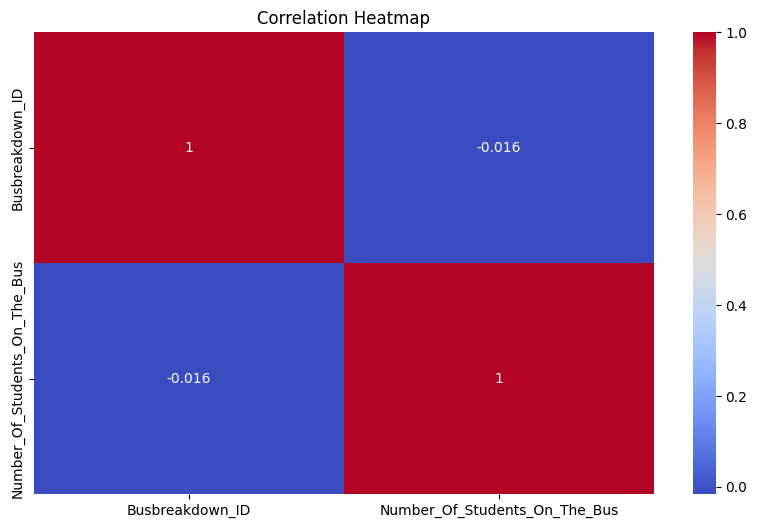

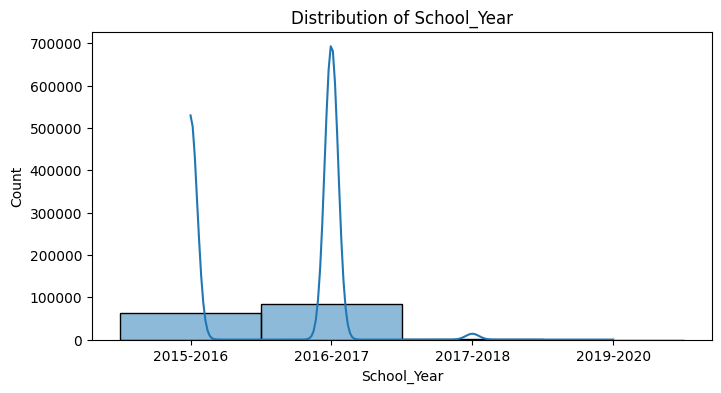

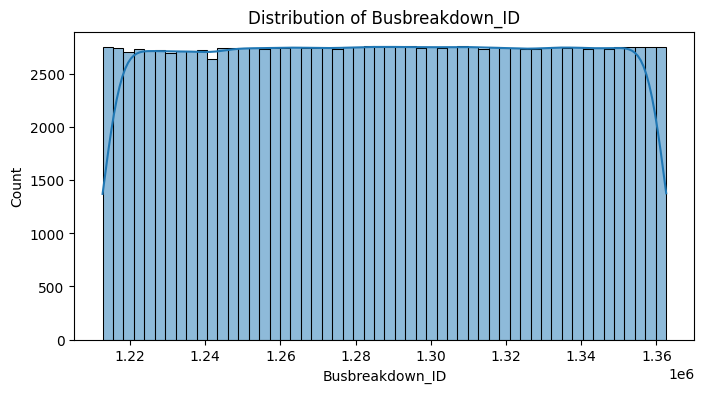

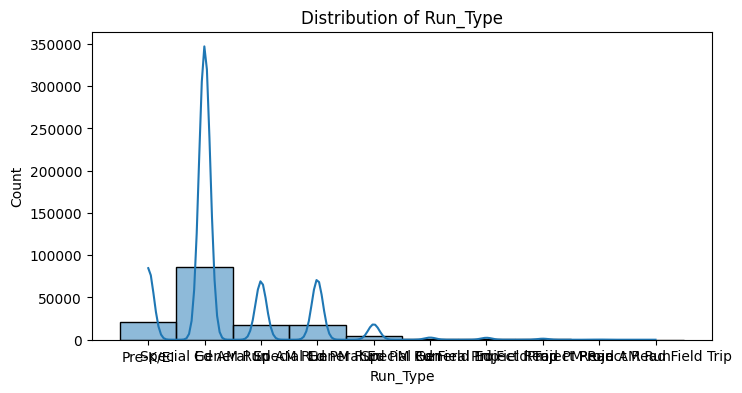

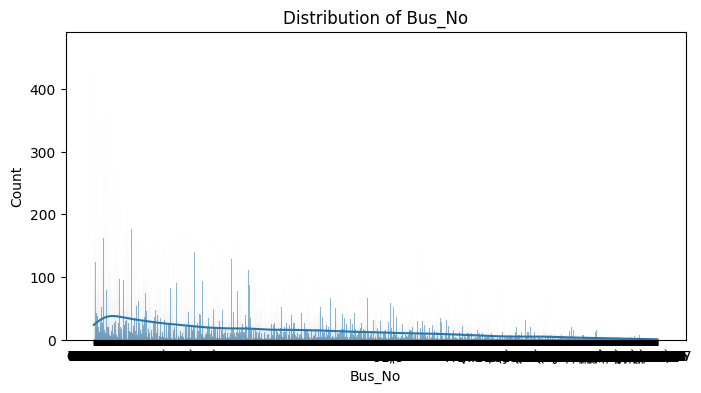

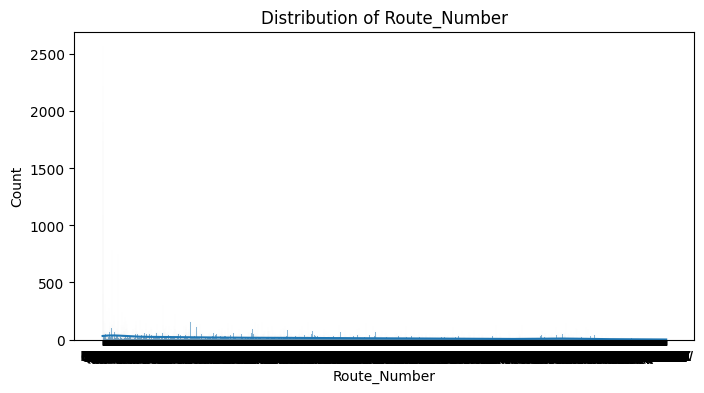

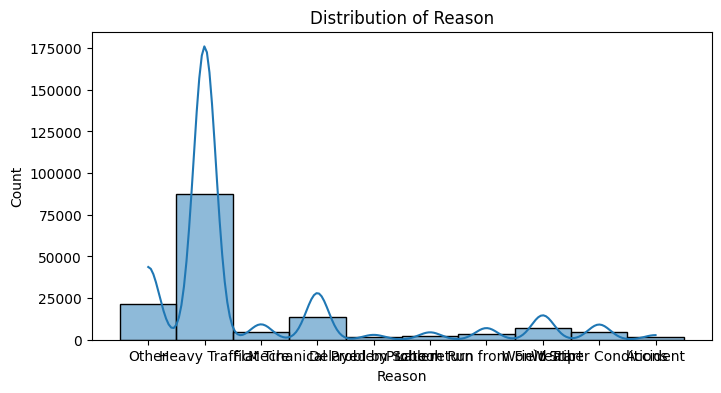

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


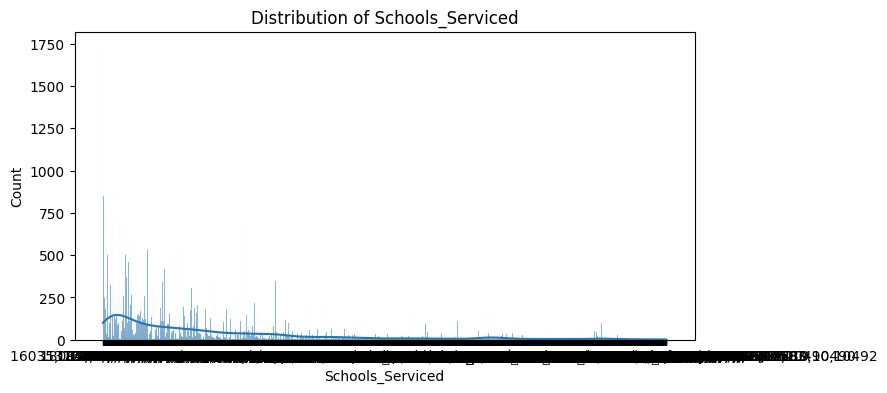

KeyboardInterrupt: 

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
for column in df.columns:
  plt.figure(figsize=(6,4))
  sns.countplot(df[column])
  plt.title(f'Distribution of {column}')
  plt.show()

for coulmn in df.columns:
  plt.figure

In [11]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


I will drop incident_number ( most of it value are missing)

In [75]:
df.drop('Incident_Number', axis=1, inplace=True)

In [62]:
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])

df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])

df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])

df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0])

df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])


In [42]:
print(df.isnull().sum())

School_Year                             0
Busbreakdown_ID                         0
Run_Type                                0
Bus_No                                  0
Route_Number                            0
Reason                                  0
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                    0
Bus_Company_Name                        0
How_Long_Delayed                        0
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64


In [63]:
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [68]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


In [44]:
print(df.columns)

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')


In [150]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_pip = make_pipeline(MinMaxScaler())
one_hot_enc = make_pipeline(OneHotEncoder())
ordinal_enc = make_pipeline(OrdinalEncoder())

pipeline = ColumnTransformer([
    ('num_scaler', num_pip, ['Number_Of_Students_On_The_Bus']),
    ('one hot enc', one_hot_enc, ['Run_Type','Reason','Boro',]),
    ('Ordinal enc', ordinal_enc, ['School_Year', 'Bus_No','Route_Number','Schools_Serviced',
    'Occurred_On',
    'Bus_Company_Name',
    'How_Long_Delayed',
    'Has_Contractor_Notified_Schools',
    'Has_Contractor_Notified_Parents',
    'Have_You_Alerted_OPT',
    'Informed_On',
    'Last_Updated_On',
    'School_Age_or_PreK'
    ]),
    ('drop', 'drop', ['Busbreakdown_ID'])])


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [166]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']
y = LabelEncoder().fit_transform(y)
X = pipeline.fit_transform(X)


In [167]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,017 (70.38 KB)

 Trainable params: 17,633 (68.88 KB)

 Non-trainable params: 384 (1.50 KB)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [170]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [171]:
early_stopping = EarlyStopping(monitor='val_loss', patience=35, restore_best_weights=True)
# the patience number is not correct I know but from the figure I can see the model did not get
# the training it need so I increas it and told it to save the best model
# the data set is easy to learn it will not consume much power

history = model.fit(X_train, y_train, batch_size= 128,
          epochs = 75,
          validation_split = 0.15,
          callbacks=[early_stopping],
          verbose=1)

Epoch 1/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5400 - loss: 0.6997 - val_accuracy: 0.6697 - val_loss: 0.6064
Epoch 2/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6923 - loss: 0.5632 - val_accuracy: 0.8796 - val_loss: 0.2947
Epoch 3/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8379 - loss: 0.3725 - val_accuracy: 0.8968 - val_loss: 0.2565
Epoch 4/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8609 - loss: 0.3348 - val_accuracy: 0.9014 - val_loss: 0.2504
Epoch 5/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8731 - loss: 0.3131 - val_accuracy: 0.9117 - val_loss: 0.2304
Epoch 6/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8782 - loss: 0.3016 - val_accuracy: 0.9066 - val_loss: 0.2396
Epoch 7/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8883 - loss: 0.2844 - val_accuracy: 0.9242 - val_loss: 0.2192
Epoch 8/75
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8961 - loss: 0.26

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [139]:
model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9362 - loss: 0.1356


[0.13576669991016388, 0.9347187280654907]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [140]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [141]:
y_pred_ = lambda x: 1 if x > 0.5 else 0
y_pred_ = np.array([y_pred_(x) for x in y_pred])
print(y_pred_)

print(classification_report(y_test, y_pred_))

[1 1 1 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      3388
           1       0.96      0.97      0.96     26207

    accuracy                           0.93     29595
   macro avg       0.85      0.81      0.83     29595
weighted avg       0.93      0.93      0.93     29595



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

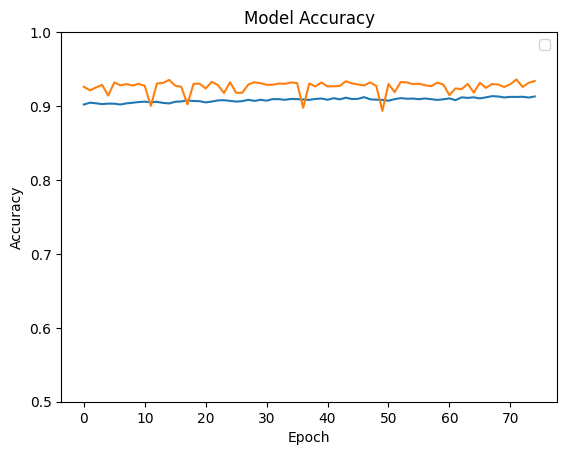

In [149]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5,1)
plt.legend()
plt.show()

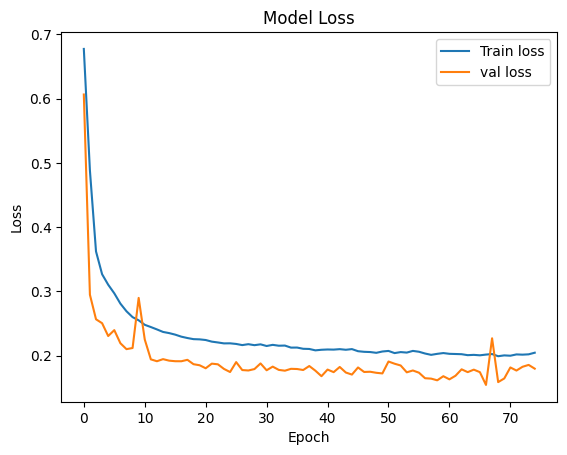

In [174]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
- encoding making the model understand teh model better,
- I did One-hot encding for teh smale featured data so i don't increase the model complixte.
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
- First I statrted with 32 nuerons for simplification and gradully increase it
- the number of layer I traied diffrent numbers this gave me the best result for the vaildation loss

3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
- I increased the number of epochs but that did not increase the accuarcy for the val set
- adam beacuse it is the best I tried Adagrad but adam is better
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?

- it is two class problem so I it is classification problem with binary_crossentropy loss ,

5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
- Dropout so the model does not depend on the some nuerons (some features)

6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
- it is a classifiction problem so we have to use binary_classifiction.
- it is important to use the right metric so the model can learn

7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?

- I did not do it. I know it is important and the training is not heavy.
-


8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

we can see the different between the trainning and vaildation loss & accuracy there is no over fittting.

### Answer Here: